## Steps to the whole project:
### 1.0: Data Pre-Processing and EDA (Exploratory Data Analysis)
#### 1.1: Data Understanding
Getting familiar with the training dataset by understanding all the features found in the dataset is needed.
#### 1.2: EDA (Exploratory Data Analysis)
Generally speaking, it is an initial investigation method that aims to use both visual and quantitative methods to understand what the data is telling.
##### 1.2.1: Dependant Variable
Visualizing the target variable
##### 1.2.2: Independant Variables
Visualization that displays all the independent variables in histogram form.
#### 1.3: Data Quality Assessment
Data quality assessment is the process of scientific and statistical measurement of data quality based on the completeness, consistency, and reliability of the data. This is a procedure that should be performed before developing any model, as most row data will contain certain levels of ‘quality’ issues.
### 2.0: Modelling
#### 2.1: k-NN Classification
#### 2.2: DecisionTree Classification
#### 2.4: Logistic Regression Classification
#### 2.5: Tuning the models
### 3.0: Model Evaluation

In [4]:
import numpy as np #for arrays & matrices (nd array) linear algebra
import pandas as pd #lib for dataframes, to show data in tabular form 
import seaborn as sns #matplotlib extension 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #to encode strings in numeric form

In [5]:
# Loading the dataset
dataset = pd.read_csv('Training Dataset.csv') #csv file converted into dataframe
dataset.head()

,Applicant_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Eligible
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Checking the dimensions of dataset
dataset.shape #property in pandas

(614, 13)

In [7]:
# Statistical Description of numeric attributes in dataset
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
# Dropping the Applicant_ID Column
# 1 = column wise, 0 = row wise
data = dataset.drop('Applicant_ID', axis=1)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Eligible
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


 ## Visualizing Target

In [21]:
target = data['Loan_Eligible']

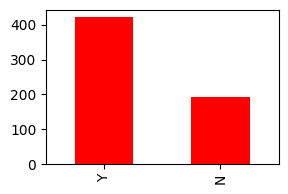

In [10]:
target.value_counts().plot(kind='bar', color='r', figsize=(3, 2))
plt.show()

# It’s common to refer to property() as a built-in function.
# However, property is a class designed to work as a function rather than as a regular class.

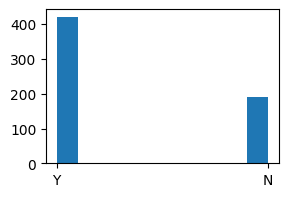

In [11]:
target.hist(figsize=(3, 2))
plt.grid(visible=False)
plt.show()

## Visualizing Attributes

#### Categorical Attributes

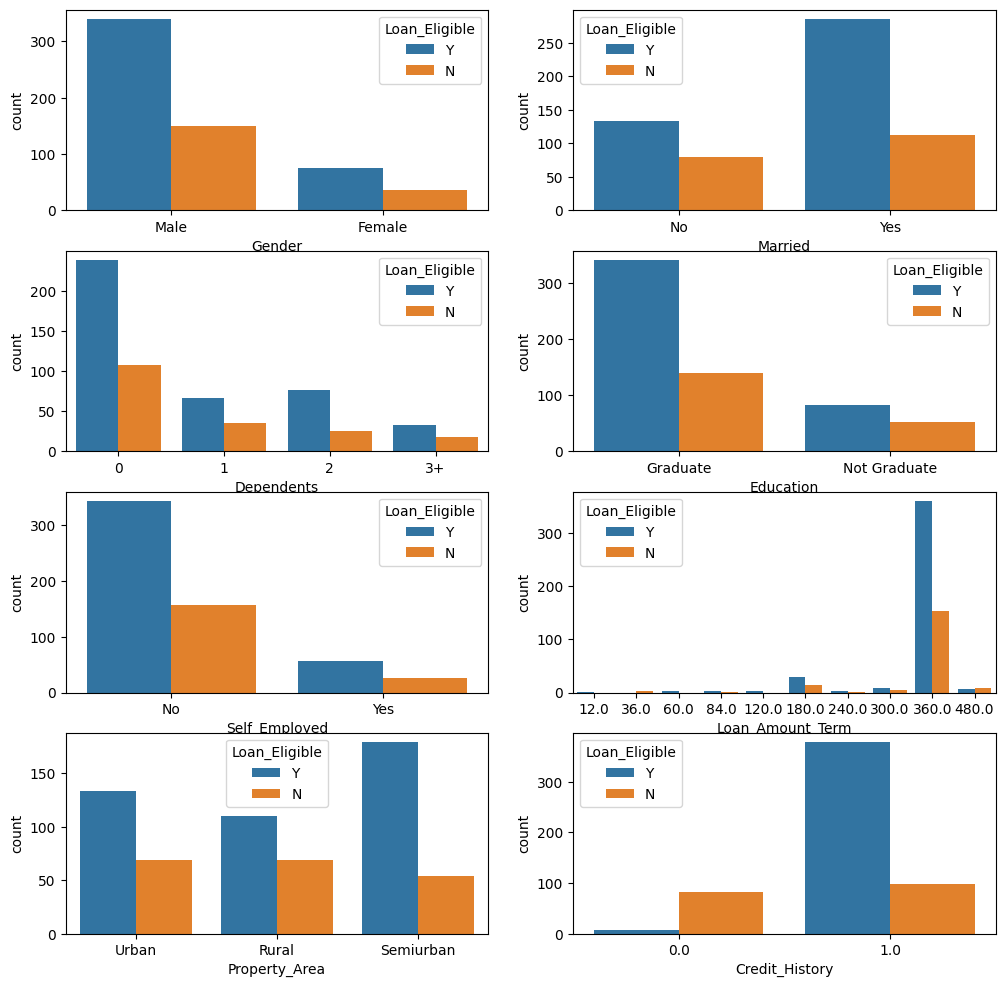

In [12]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Property_Area', 'Credit_History']

fig, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.countplot(data, x=cat_cols[0], hue='Loan_Eligible', ax=axes[0, 0])
sns.countplot(data, x=cat_cols[1], hue='Loan_Eligible', ax=axes[0, 1])
sns.countplot(data, x=cat_cols[2], hue='Loan_Eligible', ax=axes[1, 0])
sns.countplot(data, x=cat_cols[3], hue='Loan_Eligible', ax=axes[1, 1])
sns.countplot(data, x=cat_cols[4], hue='Loan_Eligible', ax=axes[2, 0])
sns.countplot(data, x=cat_cols[5], hue='Loan_Eligible', ax=axes[2, 1])
sns.countplot(data, x=cat_cols[6], hue='Loan_Eligible', ax=axes[3, 0])
sns.countplot(data, x=cat_cols[7], hue='Loan_Eligible', ax=axes[3, 1])
plt.contour
plt.show()

#### Numeric Attributes

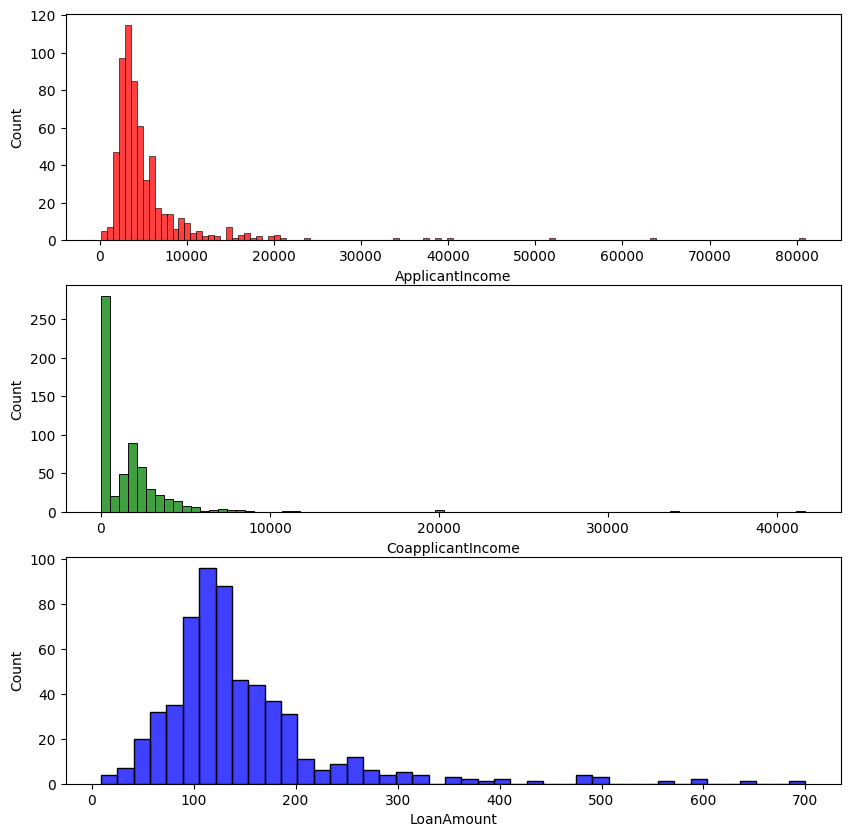

In [13]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
sns.histplot(data, x=num_cols[0], ax=axes[0], color='r')
sns.histplot(data, x=num_cols[1], ax=axes[1], color='g')
sns.histplot(data, x=num_cols[2], ax=axes[2], color='b')
plt.show()

### 1.3: Data Quality Assessment
#### Six Measures of quality assessment:
###### 1. Completeness: This is a measure of whether all of the required data is present within the dataset and if it meets the objectives of the project being worked on. If missing data are present, then it should be clear how these are handled.
###### 2. Accuracy: This is a measure of how well the data accurately reflects the object being described.
###### 3. Timeliness: This is a measure of the data being available when it is needed for decision-making. Is the data that is being worked on the latest version that is available to make appropriate interpretations?
###### 4. Consistency: This is a measure of how consistent the data is. The same data should be consistent across different storage locations, software packages and file formats.
###### 5. Validity: This is a measure of how well the data fits within pre-defined limits, expectations and standards.
###### 6. Uniqueness: Features or objects should only be represented within a particular dataset once otherwise, confusion can occur.

##### 1.3.1: Checking NULL values

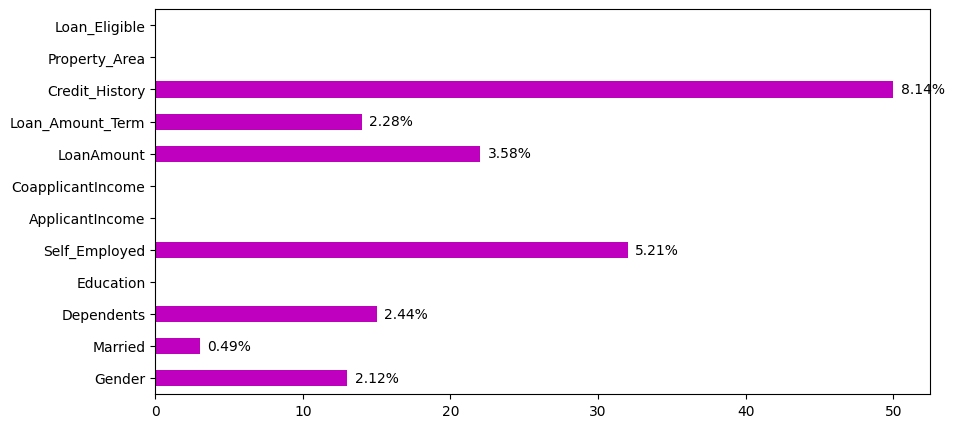

In [14]:
sumOfNulls = data.isnull().sum()
percentages = []
for i in range(len(sumOfNulls)):
    percentages.append(round((sumOfNulls[i] / 614) * 100, 2))

sumOfNulls.plot(kind='barh', color='m', figsize=(10, 5))
plt.text(15, 0, str(percentages[0]) + '%', ha='center', va='center')
plt.text(5, 1, str(percentages[1]) + '%', ha='center', va='center')
plt.text(17, 2, str(percentages[2]) + '%', ha='center', va='center')
plt.text(34, 4, str(percentages[4]) + '%', ha='center', va='center')
plt.text(24, 7, str(percentages[7]) + '%', ha='center', va='center')
plt.text(16, 8, str(percentages[8]) + '%', ha='center', va='center')
plt.text(52, 9, str(percentages[9]) + '%', ha='center', va='center')
plt.show()

#### Dealing with NULL values (Imputation)

In [15]:
data['Loan_Amount_Term'].mode()[0]  # we are taking out mode of a series, so it will check the most repeated value and it will create a new series and it will place the mode on its 0th index

360.0

In [16]:
# NULL values in credit-history can be assumed as 0 as most likely the user didn't enter any value 
# because he/she didn't have any credit history
# Inplace permanently applies any changes being made by any function
data['Credit_History'].fillna(0, inplace=True)
# Setting the Loan Amount Term's null values with the most repeated value (mode)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
# Filling the Loan Amount's null values with mean
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
# Setting Self Employed null values with mode
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
# Setting Dependents' null values to 0
data['Dependents'].fillna(0, inplace=True)
# Filling Married Status null values with mode
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
# Filling Gender null values with modes
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [17]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Eligible        0
dtype: int64

### Detecting Outliers

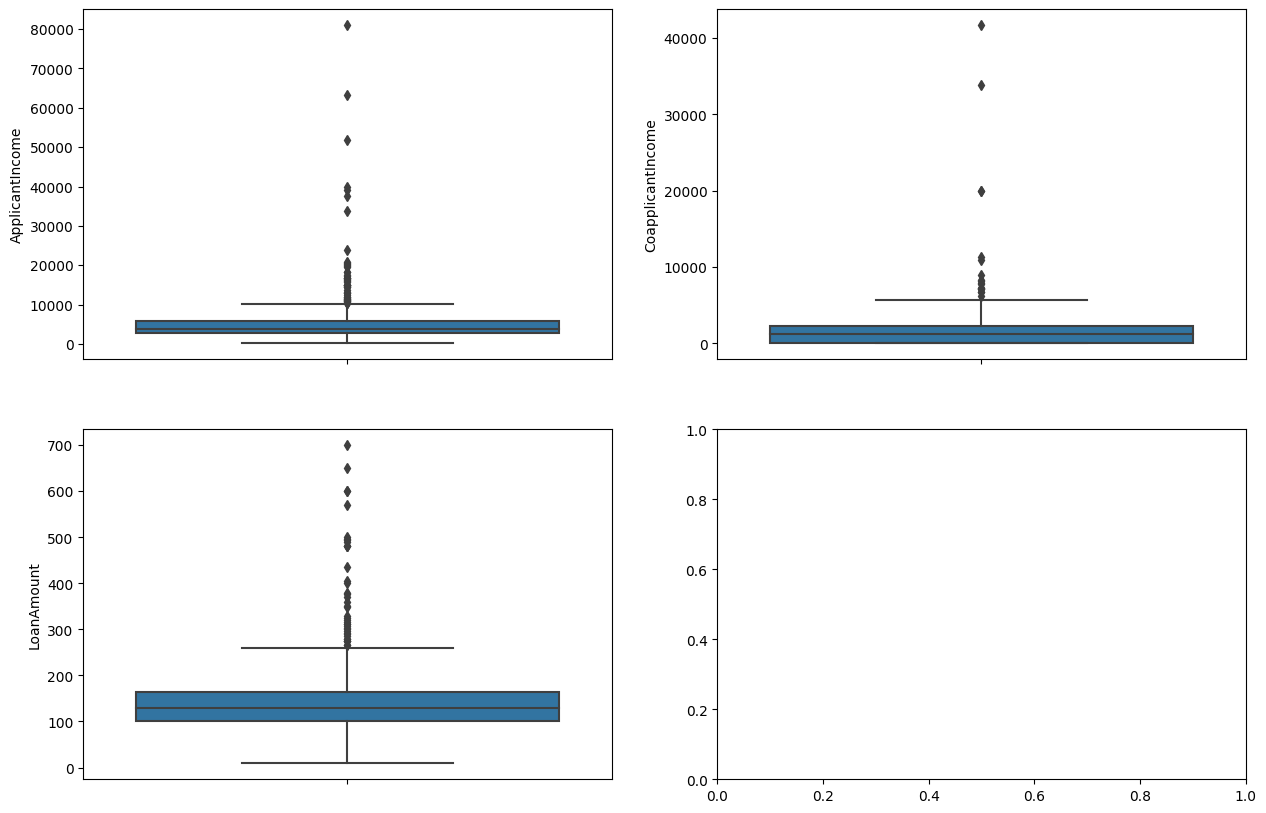

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data, y='ApplicantIncome', ax=axes[0, 0])
sns.boxplot(data, y='CoapplicantIncome', ax=axes[0, 1])
sns.boxplot(data, y='LoanAmount', ax=axes[1, 0])
plt.show()

In [19]:
# # Outliers in Applicant Income
# outliersInAI = np.where(data['ApplicantIncome'] > 27000)
# outliersInCAI = np.where(data['CoapplicantIncome'] > 12000)
# outliersInLA = np.where(data['LoanAmount'] > 450)

# print(np.where((data['LoanAmount'] > 450) & (data['ApplicantIncome'] > 27000)))

# # print(data.shape)
# # for i in range(len(outliersInAI)):
# #     data.drop(outliersInAI[i], inplace=True)
# # for i in range(len(outliersInCAI)):
# #     data.drop(outliersInCAI[i], inplace=True)
# # for i in range(len(outliersInLA)):
# #     data.drop(outliersInLA[i], inplace=True)
# # print(data.shape)